
# Part1: Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

In [3]:
import gc
gc.collect()

8

In [4]:
#reading the data from file
df_origin_train =pd.read_csv('train.csv')
df_train = df_origin_train.copy()
df_train

C:\Users\aysu1\AppData\Local\Temp\ipykernel_15960\2914216768.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin_train =pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
df_origin_test = pd.read_csv('test.csv')
df_test = df_origin_test.copy()
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


# Verilerin head, shape, data-types özelliklerini keşfedelim

In [6]:
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [7]:
display(
    df_train.info(),
    print(),
    df_test.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

None

None

In [8]:
display(
    df_train.describe().T,
    print(),
    df_test.describe().T
)

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


None

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [9]:
display(
    df_train.describe(exclude=np.number).T,
    print(),
    df_test.describe(exclude=np.number).T
)

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


None

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


# Eksik değerleri kontrol etme

In [10]:
df_train['Credit_Score'].isna().sum()

0

In [11]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Sütun adlarını kontrol etme

In [12]:
(df_train.columns[:-1]!=df_test.columns).sum()

0

In [13]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(150000, 28)

In [14]:
df['Credit_Score'].isna().sum()

50000

In [15]:
df.isnull().sum()#isnull() ile isna() fonk.lar aynı işleve sahiptirler

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [16]:
df.isnull().mean()*100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         2.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Bala

# Verilerin incelenmesi

In [17]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      150000 non-null  object
 6   Occupation               150000 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     150000 non-null  object
 12  Credit_Mix               150000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

# Boş değerlerin dışındaki garip değerleri tespit etme

In [18]:
object_col = df.describe(include='O').columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [19]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df_train[col].value_counts(dropna=False))
    print('END',"--"*18, '\n')

Column Name: ID
****************************************
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
Name
NaN               9985
Stevex  

In [20]:
df_copy1 = df.copy()
df_copy1.shape

(150000, 28)

# Boş değerler dışındaki garip değerleri temizleme

In [21]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [22]:
df = df_copy1.applymap(text_cleaning).replace(['', 'nan', '#F%$D@*&8', '!@9#%8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


In [23]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

# Veri türlerini düzeltme (value_counts(), astype(), infer_objects(), convert_dtypes())

In [24]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      141600 non-null  object
 6   Occupation               139500 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     146850 non-null  object
 12  Credit_Mix               120000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

In [25]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month'] = pd.to_datetime(df.Month, format= '%B').dt.month
df['Age'] = df.Age.astype(int)
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int32  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int32  
 5   SSN                       141600 non-null  float64
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int32  
 13  Type_of_Loan              132888 non-null  o

Kategorik Türleri Sayısal Türlere Ata

In [27]:
# df['Occupation_Num'] = df.Occupation.astype('category').cat.codes
# df['Credit_Mix_Num'] = df.Credit_Mix.astype('category').cat.codes
# df['Payment_of_Min_Amount_Num'] = df.Payment_of_Min_Amount.astype('category').cat.codes
# df['Payment_Behaviour_Num'] = df.Payment_Behaviour.astype('category').cat.codes

Credit_History_Age

In [28]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        return (num1*12)+num2
    else:
        return x
#Month_Converter('3 Years and 1 Months')

In [29]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [30]:
df.groupby('Customer_ID')['Credit_History_Age'].apply(list)

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007     [346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0...
1008     [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011     [179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0...
                               ...                        
50984    [157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ...
50990    [70.0, 71.0, 72.0, nan, nan, 75.0, 76.0, 77.0,...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 12500, dtype: object

In [31]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

Type_of_Loan
NaN                                         17112
Not Specified                                2112
Credit-Builder Loan                          1920
Personal Loan                                1908
Debt Consolidation Loan                      1896
Student Loan                                 1860
Payday Loan                                  1800
Mortgage Loan                                1764
Auto Loan                                    1728
Home Equity Loan                             1704
Personal Loan, and Student Loan               480
Not Specified, and Payday Loan                408
Mortgage Loan, and Home Equity Loan           396
Student Loan, and Payday Loan                 384
Student Loan, and Credit-Builder Loan         372
Credit-Builder Loan, and Not Specified        372
Payday Loan, and Debt Consolidation Loan      360
Payday Loan, and Auto Loan                    360
Mortgage Loan, and Not Specified              348
Payday Loan, and Personal Loan       

In [32]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [33]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                
1006         credit-builder loan,payday loan                                                                 12
1007         home equity loan,mortgage loan,student loan                                                     12
1008         NaN                                                                                             12
1009         credit-builder loan,student loan,not specified,student loan                                     12
1011         personal loan,auto loan,auto loan                                                               12
                                                                                                             ..
50984        home equity loan,mortgage loan,payday loan,mortgage loan,mortgage loan,payday loan              12
50990        mortgage loan,auto loan,auto loan                                                               1

In [34]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1008     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
                               ...                        
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50996    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [35]:
def get_Diff_Values_Colum(df_column, diff_value=[], sep=',', replace=''):
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x: x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [36]:
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

# Keşifsel Veri Analizi (EDA)

NaN değerlerini tespit et ve Customer_ID grubuna göre doldur

# Nesne sütunu NaN değerleri: Grup modu değerlerini yeniden ata

In [37]:
#İşlevi yeniden ata ve göster
def Object_NaN_Values_Reassign_Group_Mode(df, groupby, column, inplace=True):
    import scipy.stats as stats
    #Yanlış değerler atama basit işlev yap
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        #np.NaN bir şey atama
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        #yerel modla doldur
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(x.value_counts().idxmax()))
        
        if inplace:
            df[column] = result
        else:
            return result
        
    if inplace:
        #NaN değerleri atamadan önce
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')
            
        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        #atama
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        #NaN değerleri atandıktan sonra
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')
            
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
        
    else:
        #show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [38]:
df_copy2 = df.copy()
df_copy2.shape

(150000, 28)

In [39]:
df = df_copy2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int32  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int32  
 5   SSN                       141600 non-null  float64
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int32  
 13  Type_of_Loan              132888 non-null  o

Name

In [40]:
df['Name'].value_counts(dropna=False).head()

Name
NaN         15000
Stevex         66
Langep         65
Jessicad       59
Johnc          58
Name: count, dtype: int64

In [41]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Name')


Before Assigning: Name: have 15000 NaN Values

Before Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan, nan, 'Matthias Blamontb', nan, 'Matthias Blamontb']
[nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan, 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', nan]
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan, nan, 'Terry Wadeu', 'Terry Wadeu', nan]

After Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamon

In [42]:
df['Name'] = df['Name'].apply(lambda x: x.replace('"', ''))

Occupation

In [43]:
df['Occupation'].value_counts(dropna=False)

Occupation
NaN              10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: count, dtype: int64

In [44]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Occupation')


Before Assigning: Occupation: have 10500 NaN Values

Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', nan, 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', nan, 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer']

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journali

Type_of_Loan

In [45]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                
1006         credit-builder loan,payday loan                                                                 12
1007         home equity loan,mortgage loan,student loan                                                     12
1008         NaN                                                                                             12
1009         credit-builder loan,student loan,not specified,student loan                                     12
1011         personal loan,auto loan,auto loan                                                               12
                                                                                                             ..
50984        home equity loan,mortgage loan,payday loan,mortgage loan,mortgage loan,payday loan              12
50990        mortgage loan,auto loan,auto loan                                                               1

In [46]:
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

Credit_Mix

In [47]:
df['Credit_Mix'].value_counts(dropna=False)

Credit_Mix
Standard    54858
Good        36597
NaN         30000
Bad         28545
Name: count, dtype: int64

In [48]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Credit_Mix')


Before Assigning: Credit_Mix: have 30000 NaN Values

Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', 'Standard', nan, 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard

Payment_Behaviour

In [49]:
df['Payment_Behaviour'].value_counts(dropna=False)

Payment_Behaviour
Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
NaN                                 11400
Name: count, dtype: int64

In [50]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning: Payment_Behaviour: have 11400 NaN Values

Before Assigning Example Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', nan, 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_

# B.Sayısal Sütun NaN Değerleri: Min-Maks Grubunu Yeniden Ata

In [51]:
df_copy3 = df.copy()
df_copy3.shape

(150000, 28)

In [52]:
df = df_copy3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int32  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  int32  
 5   SSN                       141600 non-null  float64
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int32  
 13  Type_of_Loan              150000 non-null  o

In [53]:
df['Customer_ID'].nunique()

12500

In [54]:
#Aykırı değer aralığını tanımlama
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower) | (df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [55]:
#Yanlış değerleri yeniden ata ve işlevi göster
def Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, groupby, column, inplace=True):
    import scipy.stats as stats
    
    #yanlış aralık değerlerini tanımla
    def get_group_min_max(df, groupby, column):
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0], y[0]
    
    #yanlış değerler atama
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0], y[0]
        
        #NaN değerine yanlış değerler atayın
        col = df[column].apply(lambda x: np.NaN if ((x<mini) | (x>maxi)) else x)
        
        #yerel modla doldur
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)
        
        if inplace:
            df[column] = result
        else:
            return result
        
    if inplace:
        #NaN değerleri atamadan önce
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')
            
        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
        mini, maxi = get_group_min_max(df, groupby, column)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini}, \nmax:\t{maxi}', sep='\n', end='\n')
        
        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        #atama
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        #NaN değerleri atadıktan sonra
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')
            
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    
    else:
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

In [56]:
df.describe().columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

ID

In [57]:
df['ID'].nunique()

150000

Month

In [58]:
df['Month'].value_counts()

Month
1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: count, dtype: int64

Age

In [59]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Age')


Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	14, 
max:	56

Before Assigning Example Age:

[37, 38, 38, 8153, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[3452, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23]
[43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]

After Assigning Example Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 49.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


In [60]:
#Aykırı değeri kontrol et
get_iqr_lower_upper(df, 'Age')

Outliers: (0, 28)


(-0.5, 67.5)

SSN

In [61]:
df.SSN.value_counts(dropna=False)

SSN
NaN            8400
78735990.0       12
47161543.0       12
255398777.0      12
159517992.0      12
               ... 
414769835.0       7
695717676.0       7
803446289.0       7
74528105.0        7
642737670.0       6
Name: count, Length: 12501, dtype: int64

In [62]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'SSN')


Before Assigning: SSN: have 8400 NaN Values

Existing Min, Max Values:
min        81349.0
max    999993421.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	81349.0, 
max:	999993421.0

Before Assigning Example SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, nan, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0]
[802194704.0, nan, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.

Annual_Income

In [63]:
df.Annual_Income.value_counts(dropna=False)

Annual_Income
109945.32      24
20867.67       24
9141.63        24
17816.75       24
40341.16       24
               ..
23467279.00     1
11586734.00     1
18324322.00     1
3449550.00      1
250738.00       1
Name: count, Length: 13988, dtype: int64

In [64]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Annual_Income')


Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93, 
max:	179987.28

Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18

Monthly_Inhand_Salary

In [65]:
df.Monthly_Inhand_Salary.value_counts(dropna=False)

Monthly_Inhand_Salary
NaN             22500
2295.058333        22
6082.187500        22
6358.956667        21
3080.555000        21
                ...  
4305.385250         1
2028.727911         1
3065.776667         1
2486.532500         1
10699.849855        1
Name: count, Length: 13684, dtype: int64

In [66]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Monthly_Inhand_Salary')


Before Assigning: Monthly_Inhand_Salary: have 22500 NaN Values

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	303.6454166666666, 
max:	15204.633333333331

Before Assigning Example Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, nan, 1331.3483333333334]
[1496.7425, 1496.7425, 1496.7425, 1496.7425, nan, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425, 1496.7425]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666

Num_Bank_Accounts

In [67]:
df.Num_Bank_Accounts.value_counts(dropna=False)

Num_Bank_Accounts
6       19505
7       19231
8       19152
4       18286
5       18186
        ...  
1731        1
84          1
1458        1
1448        1
278         1
Name: count, Length: 1183, dtype: int64

In [68]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Num_Bank_Accounts')


Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1, 
max:	11

Before Assigning Example Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[3, 3, 3, 1174, 3, 3, 3, 3, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


Num_Credit_Card

In [69]:
df_train.Num_Credit_Card.value_counts(dropna=False)

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64

In [70]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0, 
max:	11

Before Assigning Example Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 750]
[4, 4, 4, 4, 4, 4, 4, 888, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 112]
[3, 3, 3, 3, 725, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


Interest_Rate

In [71]:
df.Interest_Rate.value_counts(dropna=False)

Interest_Rate
8       7515
5       7479
6       7089
12      6828
10      6799
        ... 
4985       1
2781       1
608        1
4817       1
4252       1
Name: count, Length: 2394, dtype: int64

In [72]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Interest_Rate')


Existing Min, Max Values:
min       1
max    5799
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	1, 
max:	34

Before Assigning Example Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

After Assigning Example Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


Num_of_Loan

In [73]:
df.Num_of_Loan.value_counts(dropna=False)

Num_of_Loan
3       22618
2       22547
4       22111
0       16376
1       15901
        ...  
1085        1
742         1
291         1
365         1
1442        1
Name: count, Length: 600, dtype: int64

In [74]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Num_of_Loan')


Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0, 
max:	9

Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -100]
[3, 3, 3, 3, -100, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


Delay_from_due_date

In [75]:
df.Delay_from_due_date.value_counts(dropna=False)

Delay_from_due_date
 15    5355
 13    5185
 8     5004
 14    4949
 10    4926
       ... 
 63      90
 65      86
-5       51
 66      44
 67      29
Name: count, Length: 73, dtype: int64

In [76]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Delay_from_due_date')


Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1, 
max:	62

Before Assigning Example Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 53]
[19, 19, 19, 19, 19, 19, 19, 16, 20, 19, 15, 19]
[25, 28, 22, 26, 26, 26, 26, 26, 26, 26, 21, 26]
[19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 21, 19]
[15, 15, 20, 16, 20, 20, 20, 24, 25, 20, 20, 20]

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]


Num_of_Delayed_Payment

In [77]:
df.Num_of_Delayed_Payment.value_counts(dropna=False)

Num_of_Delayed_Payment
NaN       10500
19.0       8188
17.0       8048
16.0       7949
15.0       7911
          ...  
3881.0        1
2728.0        1
1952.0        1
3580.0        1
2034.0        1
Name: count, Length: 1015, dtype: int64

In [78]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Before Assigning: Num_of_Delayed_Payment: have 10500 NaN Values

Existing Min, Max Values:
min      -3.0
max    4399.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-2.0, 
max:	25.0

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0, 18.0, 18.0, nan, nan]
[17.0, 16.0, 14.0, nan, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0,

Changed_Credit_Limit

In [79]:
df.Changed_Credit_Limit.value_counts(dropna=False)

Changed_Credit_Limit
NaN      3150
11.50     197
11.32     189
8.22      189
7.35      181
         ... 
34.57       1
31.94       1
34.46       1
23.32       1
29.17       1
Name: count, Length: 4605, dtype: int64

In [80]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Changed_Credit_Limit')


Before Assigning: Changed_Credit_Limit: have 3150 NaN Values

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.5, 
max:	29.98

Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91, 19.91, 16.91, 16.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28, 15.28]

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 17.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13, 5.13, 5.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 

Num_Credit_Inquiries

In [81]:
df.Num_Credit_Inquiries.value_counts(dropna=False)

Num_Credit_Inquiries
4.0       15673
6.0       12486
3.0       12356
7.0       12353
8.0       11788
          ...  
1243.0        1
540.0         1
2150.0        1
1324.0        1
352.0         1
Name: count, Length: 1608, dtype: int64

In [82]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Num_Credit_Inquiries')


Before Assigning: Num_Credit_Inquiries: have 3000 NaN Values

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0, 
max:	17.0

Before Assigning Example Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 848.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0, 10.0, 10.0, 10.0, 10.0]

After Assigning Example Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 13.0, 13.0, 13.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0, 5.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 11.0, 11.0, 11.0, 11.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 10.0, 10.0, 10.0]


Outstanding_Debt

In [83]:
df.Outstanding_Debt.value_counts(dropna=False)

Outstanding_Debt
1109.03    36
1151.70    36
1360.45    36
460.46     36
1058.13    24
           ..
4230.04    12
641.99     12
98.61      12
2614.48    12
502.38     12
Name: count, Length: 12203, dtype: int64

In [84]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Outstanding_Debt')


Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.23, 
max:	4998.07

Before Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8]

After Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.9

Credit_Utilization_Ratio

In [85]:
df.Credit_Utilization_Ratio.value_counts(dropna=False)

Credit_Utilization_Ratio
26.822620    1
39.377219    1
40.565631    1
41.255522    1
33.638208    1
            ..
26.650258    1
23.864244    1
29.638130    1
31.875399    1
34.108530    1
Name: count, Length: 150000, dtype: int64

In [86]:
df.Credit_Utilization_Ratio.isna().sum()

0

Credit_History_Age

In [87]:
df.Credit_History_Age.value_counts(dropna=False)

Credit_History_Age
NaN      13500
215.0      628
220.0      621
219.0      617
237.0      615
         ...  
3.0         20
2.0         15
407.0       15
408.0       14
1.0          2
Name: count, Length: 409, dtype: int64

In [88]:
colum = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())
df['Credit_History_Age'] = colum.reset_index(level=0, drop=True)

Total_EMI_per_month

In [89]:
df.Total_EMI_per_month.value_counts(dropna=False)

Total_EMI_per_month
0.000000        15615
49.574949          12
16.528703          12
64.443403          12
331.719510         12
                ...  
10404.000000        1
15457.000000        1
59578.000000        1
43183.000000        1
33013.000000        1
Name: count, Length: 16960, dtype: int64

In [90]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Total_EMI_per_month')


Existing Min, Max Values:
min        0.0
max    82398.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0, 
max:	1779.1032538262775

Before Assigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543]
[257.7386460249556

Amount_invested_monthly

In [91]:
df.Amount_invested_monthly.value_counts(dropna=False)

Amount_invested_monthly
NaN             6750
10000.000000    6480
0.000000         275
80.415295          1
16.532189          1
                ... 
209.172746         1
333.014809         1
274.687129         1
220.581212         1
220.457878         1
Name: count, Length: 136498, dtype: int64

In [92]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Amount_invested_monthly')


Before Assigning: Amount_invested_monthly: have 6750 NaN Values

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0, 
max:	10000.0

Before Assigning Example Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686, 116.54410553197071, 79.08087443658461, 93.81567846791012, 168.43584020560507]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156, 104.33987358576769, 55.45176127748453, nan, nan]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202, 50.930150099663045, 86.4414839594447, 351.92301846584564, 55.62866930298164]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.

Monthly_Balance

In [93]:
df.Monthly_Balance.value_counts(dropna=False)

Monthly_Balance
 NaN             1762
-3.333333e+26      15
 6.001125e+02       1
 1.205425e+02       1
 7.840175e+02       1
                 ... 
 2.799825e+02       1
 2.606716e+02       1
 2.504915e+02       1
 2.438753e+02       1
 3.603797e+02       1
Name: count, Length: 148225, dtype: int64

In [94]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Monthly_Balance')


Before Assigning: Monthly_Balance: have 1762 NaN Values

Existing Min, Max Values:
min   -3.333333e+26
max    1.606518e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26, 
max:	1183.9306960885192

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768, 45

# Temizliğin Sonu

In [95]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


In [96]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int32  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  float64
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

In [98]:
df.to_csv("clean_credit_score_classification.csv", index=False)

In [99]:
df = pd.read_csv('clean_credit_score_classification.csv')

C:\Users\aysu1\AppData\Local\Temp\ipykernel_15960\1716657299.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_credit_score_classification.csv')


# Modellemeyi hazırlama

In [100]:
df[df['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,51128,20266,3,Margaretf,39.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,40.586736,269.0,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
30331,51129,20266,4,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,39.369401,270.0,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
30332,51130,20266,5,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,28.702053,271.0,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
30333,51131,20266,6,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,34.808390,272.0,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
30334,51132,20266,7,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,35.206427,273.0,No,196.587321,172.992021,High_spent_Large_value_payments,913.835324,Good
30335,51133,20266,8,Margaretf,40.0,807035415.0,Engineer,128305.76,10434.146667,-1.0,...,Good,1151.70,38.278518,274.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
43689,71167,43128,2,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,37.286105,246.0,No,0.000000,668.144454,High_spent_Medium_value_payments,588.947796,Poor
43690,71168,43128,3,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,41.915627,247.0,No,0.000000,142.319789,High_spent_Large_value_payments,1084.772461,Poor
43691,71169,43128,4,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,41.799942,248.0,No,0.000000,467.563923,High_spent_Small_value_payments,779.528327,Poor
43692,71170,43128,5,Douwe Miedemaz,54.0,300544627.0,Engineer,117851.07,9870.922500,-1.0,...,Good,607.78,46.244581,249.0,No,0.000000,142.319789,High_spent_Large_value_payments,1037.506338,Poor


In [101]:
df[df['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([20266, 43128, 17340, 22931], dtype=int64)

In [102]:
df[df['Customer_ID']==22931]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,89082,22931,1,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,89083,22931,2,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,89084,22931,3,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,89085,22931,4,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,0.0,...,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,89086,22931,5,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,89087,22931,6,Stephensonq,40.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,89088,22931,7,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,26.574175,287.0,No,16.483566,64.860838,Low_spent_Small_value_payments,400.389846,Standard
55639,89089,22931,8,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard
127816,89090,22931,9,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,32.468370,289.0,No,16.483566,291.127877,Low_spent_Small_value_payments,214.122807,NaN
127817,89091,22931,10,Stephensonq,41.0,120482348.0,Developer,30352.11,2317.3425,-1.0,...,Good,644.57,36.605320,290.0,NM,16.483566,75.160896,High_spent_Medium_value_payments,390.089788,NaN


In [103]:
df.loc[df['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [104]:
df[df['Delay_from_due_date']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
49,5707,10314,2,Nadiaq,34.0,411510676.0,Lawyer,131313.40,11242.783333,0.0,...,Good,352.16,31.983710,368.0,No,137.644605,698.873271,High_spent_Small_value_payments,547.760457,Good
78,5748,47624,7,Jamesj,45.0,366681681.0,Journalist,31370.80,2825.233333,1.0,...,Good,421.43,22.762202,323.0,No,46.616129,188.394900,Low_spent_Small_value_payments,337.512304,Good
88,5766,49323,1,Soyoungd,32.0,342902649.0,Engineer,88640.24,7266.686667,3.0,...,Good,950.36,28.210617,305.0,No,135.173371,98.931764,High_spent_Large_value_payments,732.563532,Standard
95,5773,49323,8,Soyoungd,33.0,342902649.0,Engineer,88640.24,7266.686667,3.0,...,Good,950.36,30.870799,312.0,No,135.173371,98.441951,High_spent_Large_value_payments,733.053344,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148361,150723,30655,10,Clarkb,46.0,454708973.0,Entrepreneur,83158.26,7033.855000,1.0,...,Good,241.08,39.050600,275.0,No,186.877567,242.869220,High_spent_Medium_value_payments,523.638713,NaN
148785,151995,47927,10,Paul Carstenu,33.0,94945212.0,Developer,74557.58,6114.131667,2.0,...,Good,206.26,31.645554,372.0,No,0.000000,465.273618,Low_spent_Medium_value_payments,426.139549,NaN
148916,152390,8125,9,Jane Chungn,41.0,905878021.0,Writer,76881.84,6529.820000,3.0,...,Good,257.87,34.182851,335.0,No,61.440036,143.754584,High_spent_Large_value_payments,687.787379,NaN
149287,153497,23286,12,Maril,26.0,15208263.0,Accountant,123915.99,10336.332500,3.0,...,Good,1394.91,38.054845,208.0,No,156.988147,691.923200,Low_spent_Medium_value_payments,464.721903,NaN


In [105]:
df[df['Delay_from_due_date']<0]['Customer_ID'].unique()

array([ 3392, 10314, 47624, 49323, 29152,  6806, 39249, 25414,  7486,
        8086, 46990,  1345, 47754, 18364, 48117, 25714, 11139,  9918,
       24967,  2341, 31884, 17203, 38196,  5636, 34701, 29149, 49612,
       27608, 45442,  1933, 14398, 42740, 31516, 10147,  8668, 44761,
       49882, 12828,  7344,  5703, 31079, 28707, 42133, 30982, 26811,
       41487, 31866, 18498, 20132, 47316, 44503, 43059, 18461, 13949,
       22966, 35079, 44315, 40630,  4640,  2228, 18818, 36719, 19677,
       49133,  5232, 11652, 18501, 13181, 33902, 39919, 17514, 48100,
       11127, 32180, 32314, 15100, 40657, 35586, 25283, 23374, 20322,
       46863,  6244, 14905, 32587,  4022,  7868,  9919, 10584,  4798,
       38650, 28671, 19569, 30646, 45057, 27791, 50666, 43661, 14000,
        3439, 24918, 18373, 50944, 35210, 46221, 22325,  5019, 38132,
        3567, 40741, 30190, 50771, 21532, 28827, 46283, 40664, 40069,
       32882, 19936, 15725, 41515,  3023, 50522, 48842,  6436, 45156,
       39563, 27247,

In [106]:
df[df['Customer_ID']==4164].iloc[:,0:15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
98640,153594,4164,1,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,5.0
98641,153595,4164,2,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
98642,153596,4164,3,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
98643,153597,4164,4,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,5.0
98644,153598,4164,5,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
98645,153599,4164,6,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
98646,153600,4164,7,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
98647,153601,4164,8,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
149320,153602,4164,9,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,1.0
149321,153603,4164,10,Maki Shirakip,44.0,261184430.0,Entrepreneur,33441.59,2748.799167,2.0,4.0,1.0,0.0,No Data,-1.0


In [107]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [108]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Delay_from_due_date')


Before Assigning: Delay_from_due_date: have 311 NaN Values

Existing Min, Max Values:
min     0.0
max    62.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0, 
max:	62.0

Before Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0,

In [109]:
df[df['Num_of_Delayed_Payment']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.840,3037.986667,2.0,...,Good,605.03,33.224951,321.0,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
698,6680,29152,3,Aruna Viswanathau,28.0,330960638.0,Mechanic,15398.950,1548.245833,1.0,...,Good,343.84,33.494442,341.0,NM,34.813970,47.607470,High_spent_Medium_value_payments,322.403143,Standard
1561,7975,45940,2,enu,32.0,946089738.0,Architect,30922.280,2494.856667,1.0,...,Good,957.53,39.135924,256.0,No,30.338204,159.523585,Low_spent_Large_value_payments,329.623877,Poor
2167,8881,10251,8,orv,27.0,434178443.0,Accountant,34841.870,3025.489167,1.0,...,Good,142.05,38.351183,374.0,No,33.366098,174.874086,Low_spent_Medium_value_payments,374.308732,Standard
2224,8970,3333,1,Daniel Flynnu,45.0,600021948.0,Musician,132537.240,10831.770000,3.0,...,Good,382.04,44.604220,353.0,No,60.510150,210.350125,High_spent_Large_value_payments,1052.316725,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149243,153365,12580,12,Philz,54.0,921270890.0,Journalist,43502.680,3733.223333,0.0,...,Good,862.14,28.283294,318.0,No,32.032328,503.575571,Low_spent_Small_value_payments,127.714435,NaN
149285,153495,23286,10,Maril,26.0,15208263.0,Accountant,123915.990,10336.332500,3.0,...,Good,1394.91,36.333194,206.0,NM,156.988147,260.694372,High_spent_Large_value_payments,855.950731,NaN
149288,153506,40156,9,Mostafavin,24.0,187132907.0,Scientist,16937.425,1162.452083,4.0,...,Good,167.57,27.203021,265.0,No,7.247943,100.919000,Low_spent_Medium_value_payments,288.078266,NaN
149289,153507,40156,10,Mostafavin,24.0,187132907.0,Scientist,16937.425,1162.452083,4.0,...,Good,167.57,33.875308,266.0,No,7.247943,123.801030,Low_spent_Small_value_payments,275.196236,NaN


In [110]:
df[df['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

array([ 8625, 29152, 45940, 10251,  3333,  3929, 21293,  4426, 25414,
       16167, 21322, 10123, 35188, 26218, 28910, 32265, 11773, 47754,
       14290, 20016, 19075, 49507, 13075, 48148, 45080,  4477, 37628,
       35058, 19758, 17488, 11148, 13654, 36050, 33615, 11176,  4829,
       48209, 34440, 44404, 47715, 10269, 39909, 26631, 31123, 39182,
       13666,  9624,  3559, 15614, 47448, 19145, 25434, 33042,  1604,
       48331, 11426, 13888, 41376, 48578, 44043,  5136, 27608,  2221,
       29037, 35859, 18007, 45442, 48633, 16890, 43386, 23420, 25655,
        2170,  4483,  5754, 32772,  8778,  3626, 26972,  8668, 15729,
       37190, 10351, 17846, 38293, 20868, 30410, 50983, 11542, 45048,
       21518, 35124, 29088, 22029, 39733, 21719, 11988, 44699, 42964,
       37741, 36766, 13582, 39656, 31866, 23184,  5843, 50902, 20553,
       35440, 44118, 21037, 32270, 44792, 44787, 24955, 43895, 47613,
       15925, 18596,  8978, 41665, 49076,  4640, 17192, 13592, 47760,
       31094,  8727,

In [111]:
df[df['Customer_ID']==8625].iloc[:,0:20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,4.0,5.42,2.0,Good,605.03
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,7.0,1.0,7.42,2.0,Good,605.03
10,5648,8625,3,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,-1.0,5.42,2.0,Good,605.03
11,5649,8625,4,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,3.0,5.42,2.0,Good,605.03
12,5650,8625,5,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,1.0,6.42,2.0,Good,605.03
13,5651,8625,6,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,0.0,5.42,2.0,Good,605.03
14,5652,8625,7,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,4.0,5.42,2.0,Good,605.03
15,5653,8625,8,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,4.0,5.42,2.0,Good,605.03
100004,5654,8625,9,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,1.0,5.42,5.0,Good,605.03
100005,5655,8625,10,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,3.0,3.0,5.42,5.0,Good,605.03


In [112]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [113]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Before Assigning: Num_of_Delayed_Payment: have 791 NaN Values

Existing Min, Max Values:
min     0.0
max    25.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0, 
max:	25.0

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0,

In [114]:
df[df['Monthly_Balance']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,13951,39045,2,Paul Dayl,17.0,186499679.0,Developer,41086.400,3660.866667,3.0,...,Standard,113.98,34.826541,138.0,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.310,2551.359167,3.0,...,Good,917.00,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
29158,49368,10381,7,Selamk,55.0,970198342.0,Lawyer,30748.930,2572.410833,1.0,...,Good,860.97,40.634250,233.0,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard
35570,58988,34281,3,Anna Driveri,45.0,288627562.0,Musician,20929.295,1704.107917,5.0,...,Good,858.09,33.943626,259.0,No,40.398175,220.304552,Low_spent_Small_value_payments,-3.333333e+26,Standard
38622,63564,11127,7,Longstretho,21.0,6360111.0,Doctor,15167.620,1471.968333,4.0,...,Good,847.03,28.541848,331.0,NM,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard
41828,68374,9905,5,Wanfenga,42.0,71501701.0,Architect,160052.200,13580.683333,4.0,...,Good,1118.35,44.113346,260.0,No,207.864807,160.307954,High_spent_Medium_value_payments,-3.333333e+26,Standard
60009,95647,49262,2,radenp,30.0,46725387.0,Journalist,92114.680,7811.223333,3.0,...,Standard,820.52,39.089475,250.0,Yes,54.219664,77.288944,High_spent_Large_value_payments,-3.333333e+26,Standard
75251,118509,22515,4,Kristen Haysq,29.0,577850830.0,Mechanic,60904.590,5080.382500,3.0,...,Standard,2441.47,29.878716,155.0,Yes,61.525140,394.893957,Low_spent_Small_value_payments,-3.333333e+26,Standard
82918,130008,16831,7,Doeringq,44.0,693647611.0,Journalist,61990.520,4900.876667,10.0,...,Bad,3618.91,37.718591,164.0,NM,355.143396,194.283488,Low_spent_Small_value_payments,-3.333333e+26,Standard
83255,130513,12158,8,Sabina Zawadzkif,31.0,109482095.0,Doctor,126353.040,10635.420000,4.0,...,Standard,859.77,28.442867,381.0,No,167.043910,549.766139,Low_spent_Medium_value_payments,-3.333333e+26,Poor


In [115]:
df[df['Monthly_Balance']<0]['Customer_ID'].unique()

array([39045, 23184, 10381, 34281, 11127,  9905, 49262, 22515, 16831,
       12158, 17273, 17553, 27806, 44732, 20713], dtype=int64)

In [116]:
df[df['Customer_ID']==23184]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26176,44898,23184,1,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,36.718433,380.0,No,34.496445,103.349985,High_spent_Medium_value_payments,3.672895e+02,Standard
26177,44899,23184,2,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,38.198076,381.0,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
26178,44900,23184,3,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,29.586631,382.0,No,34.496445,211.196133,Low_spent_Small_value_payments,2.994433e+02,Good
26179,44901,23184,4,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,33.256569,383.0,No,34.496445,10000.000000,Low_spent_Small_value_payments,2.697455e+02,Good
26180,44902,23184,5,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,29.891666,384.0,No,34.496445,27.408165,High_spent_Medium_value_payments,4.432313e+02,Good
26181,44903,23184,6,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,40.523081,385.0,No,34.496445,81.238820,Low_spent_Medium_value_payments,4.194007e+02,Good
26182,44904,23184,7,Scuffhamq,45.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,39.310459,386.0,No,34.496445,203.985506,Low_spent_Medium_value_payments,2.966540e+02,Standard
26183,44905,23184,8,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,37.958950,387.0,No,34.496445,268.713564,Low_spent_Small_value_payments,2.419259e+02,Good
113088,44906,23184,9,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,36.353540,388.0,No,34.496445,47.255861,High_spent_Large_value_payments,4.133836e+02,NaN
113089,44907,23184,10,Scuffhamq,46.0,264531943.0,Engineer,29728.31,2551.359167,3.0,...,Good,917.0,36.194359,389.0,No,34.496445,24.033229,High_spent_Large_value_payments,4.366062e+02,NaN


In [117]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = None

In [118]:
Numeric_Wrong_Values_Reassign_Group_Min_MAx(df, 'Customer_ID', 'Monthly_Balance')


Before Assigning: Monthly_Balance: have 17 NaN Values

Existing Min, Max Values:
min       0.007760
max    1183.930696
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0077596647753352, 
max:	1183.9306960885192

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.0440966398364, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.6189847840633, 239.46481499922072, 334.61958840607645, 275.3861034815317, 279.58867604354555, 318.4767883518287, 260.7342254927612, 307.57591763672826]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313, 474.5734332336703, 439.0620993738886, 203.58056486748768, 459.87491403

In [119]:
df[df['Amount_invested_monthly']>=10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,5660,11708,3,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,Good,1303.01,26.519815,215.0,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,5665,11708,8,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,...,Good,1303.01,38.374753,220.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,5674,47249,5,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,...,Good,632.46,41.154317,211.0,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
121,5815,13266,2,Chalmersa,30.0,965462491.0,Scientist,31993.78,2942.148333,6.0,...,Standard,818.22,37.958569,203.0,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,5844,4059,7,Patrickg,46.0,928914452.0,Teacher,32284.62,2898.385000,6.0,...,Standard,1283.37,24.205533,83.0,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149942,155464,18426,11,Yantoultra Nguif,32.0,291517240.0,Mechanic,64511.34,5440.945000,7.0,...,Standard,330.60,31.083920,284.0,Yes,0.000000,10000.0,High_spent_Large_value_payments,658.261080,NaN
149945,155475,35242,10,Kwokw,39.0,18637005.0,Manager,85744.12,7125.343333,6.0,...,Standard,717.79,39.847437,192.0,Yes,72.099176,10000.0,Low_spent_Small_value_payments,421.112538,NaN
149952,155498,41043,9,t Astridn,39.0,94815856.0,Writer,87695.34,7337.945000,2.0,...,Good,361.68,37.329252,237.0,No,0.000000,10000.0,High_spent_Large_value_payments,859.006805,NaN
149989,155607,44897,10,Chris Wickhamm,50.0,133167738.0,Writer,37188.10,3097.008333,1.0,...,Good,620.64,23.986021,366.0,No,84.205949,10000.0,Low_spent_Large_value_payments,270.754039,NaN


In [120]:
df[df['Amount_invested_monthly']>=10000]['Customer_ID'].unique()

array([11708, 47249, 13266, ..., 41043, 44897, 37932], dtype=int64)

In [121]:
df[df['Customer_ID']==44897]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99976,155598,44897,1,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,39.080823,357.0,No,84.205949,223.875018,Low_spent_Small_value_payments,291.619866,Good
99977,155599,44897,2,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,32.803431,358.0,No,84.205949,70.869970,High_spent_Large_value_payments,394.624914,Good
99978,155600,44897,3,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,24.540510,359.0,No,84.205949,125.956592,Low_spent_Medium_value_payments,379.538292,Good
99979,155601,44897,4,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,36.979007,360.0,NM,84.205949,215.486386,Low_spent_Small_value_payments,300.008498,Good
99980,155602,44897,5,Chris Wickhamm,49.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,27.495263,361.0,No,84.205949,78.497727,Low_spent_Small_value_payments,396.997157,Standard
99981,155603,44897,6,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,37.753013,362.0,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good
99982,155604,44897,7,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,38.850680,363.0,No,84.205949,82.825572,Low_spent_Small_value_payments,412.669312,Good
99983,155605,44897,8,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,39.300980,364.0,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good
149988,155606,44897,9,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,32.740865,365.0,No,84.205949,165.115322,Low_spent_Small_value_payments,350.379562,NaN
149989,155607,44897,10,Chris Wickhamm,50.0,133167738.0,Writer,37188.1,3097.008333,1.0,...,Good,620.64,23.986021,366.0,No,84.205949,10000.000000,Low_spent_Large_value_payments,270.754039,NaN


<AxesSubplot:>

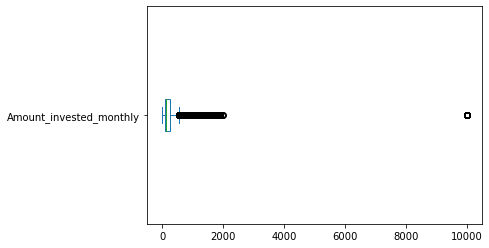

In [122]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [123]:
df.loc[df['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<AxesSubplot:>

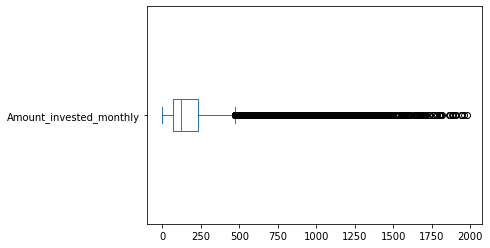

In [124]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [125]:
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [126]:
df[df['Credit_Score'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  object 

In [127]:
df[df['Credit_Score'].notna()].to_csv("train.csv", index=False)

In [128]:
df[df['Credit_Score'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 100000 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay

In [129]:
df[df['Credit_Score'].isna()].drop(columns='Credit_Score').to_csv("test.csv", index=False)

## Download Link

In [131]:
from IPython.display import FileLink, FileLinks
train_file = FileLink(r'train.csv', result_html_prefix="Click here to download: ")
test_file = FileLink(r'test.csv', result_html_prefix="Click here to download: ")

display(train_file, test_file)

C:\Users\aysu1\Desktop\aysu\Untitled Folder\Untitled Folder\train.csv

C:\Users\aysu1\Desktop\aysu\Untitled Folder\Untitled Folder\test.csv